<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 162.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 167.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 152.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 132.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 134.2 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd

Import matplotlib


In [3]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [8]:
## Write your code here
duplicate_count = df.duplicated().sum()
print(duplicate_count)

duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())

20
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   
65440                  

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [10]:
## Write your code here
# Identify duplicates based on selected columns
columns_of_interest = ['MainBranch', 'Employment', 'RemoteWork']
duplicates_subset = df.duplicated(subset=columns_of_interest, keep=False)
print(f"Number of rows that are duplicates based on selected columns: {duplicates_subset.sum()}")

# Display duplicated rows based on selected columns
print("\nSample of rows duplicated based on selected columns:")
print(df[duplicates_subset].head())

# Analyze which columns frequently have identical values
duplicate_df = df[duplicates_subset].copy()
identical_values = {}

for column in df.columns:
    # Check if values are identical within duplicate groups
    groups = duplicate_df.groupby(columns_of_interest)[column]
    # Calculate percentage of groups where all values are identical
    identical_count = sum(1 for _, group in groups if group.nunique() == 1)
    total_groups = len(groups.groups)
    if total_groups > 0:
        percentage = (identical_count / total_groups) * 100
        identical_values[column] = percentage

# Sort and display columns by percentage of identical values
sorted_columns = sorted(identical_values.items(), key=lambda x: x[1], reverse=True)
print("\nColumns with identical values across duplicate rows:")
for column, percentage in sorted_columns[:10]:  # Show top 10
    print(f"{column}: {percentage:.2f}%")

Number of rows that are duplicates based on selected columns: 65290

Sample of rows duplicated based on selected columns:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to o

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


<Figure size 1200x600 with 0 Axes>

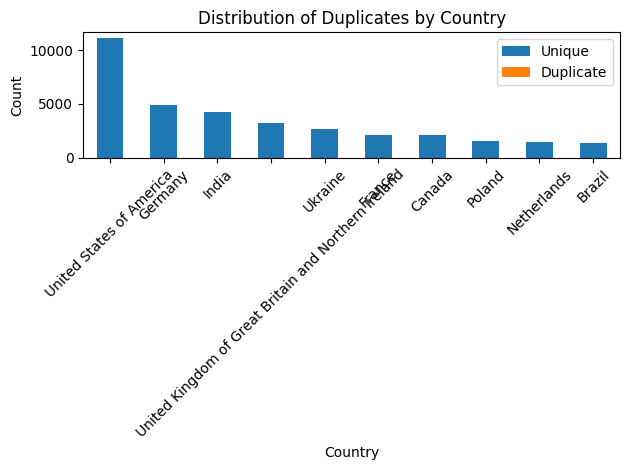

/tmp/ipykernel_300/3613587155.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

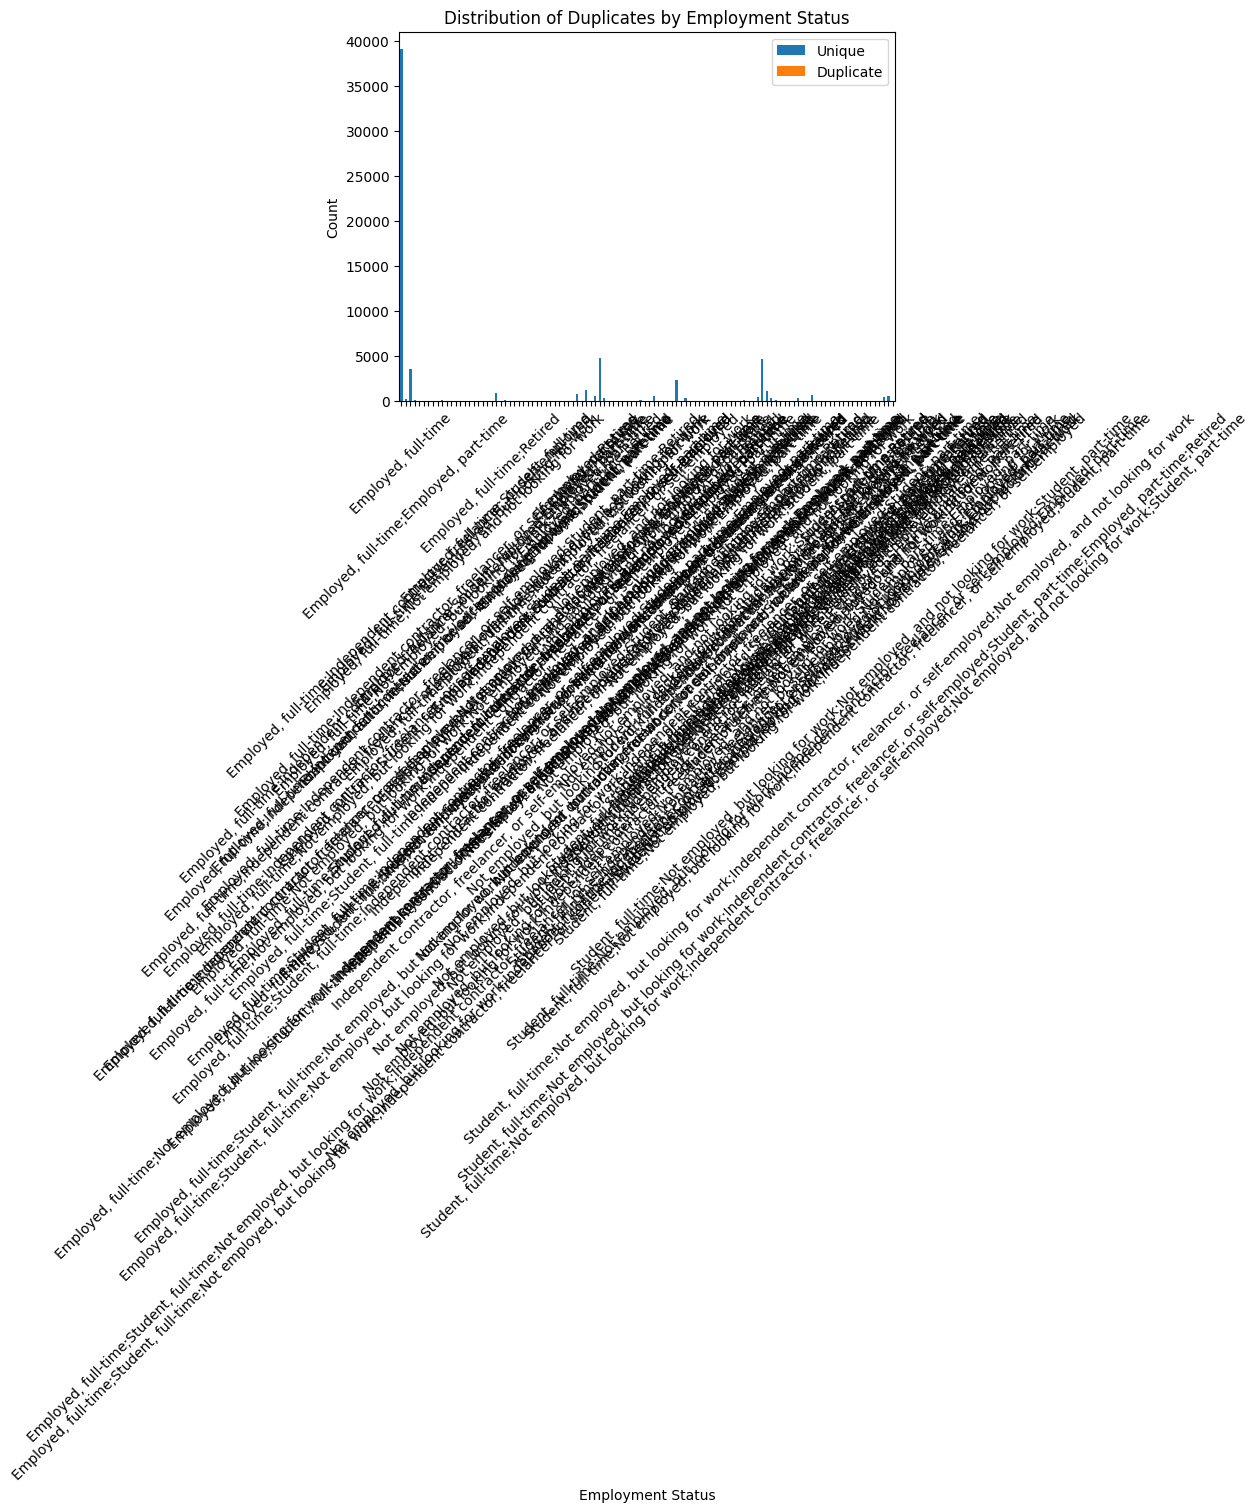

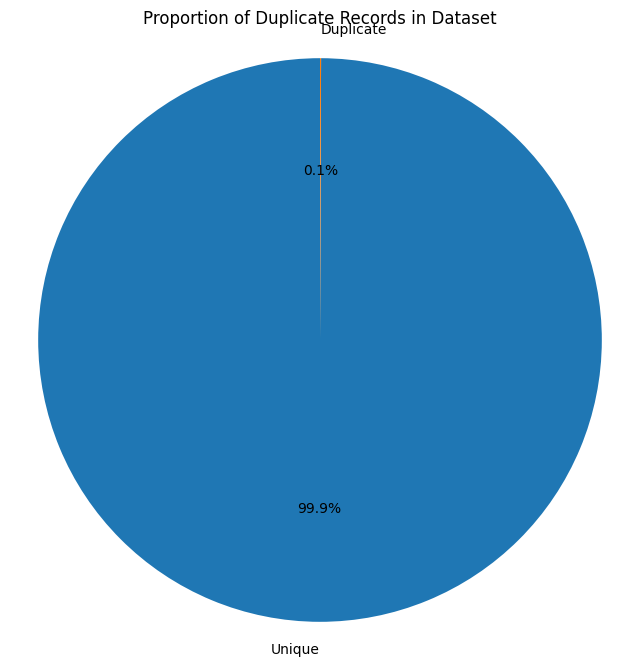

In [13]:
# Add a column to mark duplicates for visualization
df['is_duplicate'] = df.duplicated(keep=False)

# Check if 'Country' column exists in the dataset
if 'Country' in df.columns:
    # Distribution of duplicates by Country (top 10 countries)
    country_counts = df.groupby(['Country', 'is_duplicate']).size().unstack().fillna(0)
    top_countries = country_counts.sum(axis=1).sort_values(ascending=False).head(10).index
    country_data = country_counts.loc[top_countries]
    
    plt.figure(figsize=(12, 6))
    country_data.plot(kind='bar', stacked=True)
    plt.title('Distribution of Duplicates by Country')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(['Unique', 'Duplicate'])
    plt.tight_layout()
    plt.show()
else:
    print("Country column not found in the dataset")

# Distribution of duplicates by Employment
emp_counts = df.groupby(['Employment', 'is_duplicate']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
emp_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Duplicates by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Unique', 'Duplicate'])
plt.tight_layout()
plt.show()

# Pie chart showing overall proportion of duplicates
plt.figure(figsize=(8, 8))
duplicate_summary = df['is_duplicate'].value_counts()
plt.pie(duplicate_summary, labels=['Unique', 'Duplicate'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Duplicate Records in Dataset')
plt.axis('equal')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [ ]:
## Write your code here
# Original dataset size
original_size = len(df)
print(f"Original dataset size: {original_size}")

# Decide which columns are critical for defining uniqueness
# For this example, let's use ResponseId as it should be unique
if len(df[df.duplicated(subset=['ResponseId'])]) > 0:
    print(f"Number of duplicated ResponseId: {df.duplicated(subset=['ResponseId']).sum()}")
    
    # Remove duplicates based on ResponseId
    df_cleaned_id = df.drop_duplicates(subset=['ResponseId'])
    print(f"Dataset size after removing ResponseId duplicates: {len(df_cleaned_id)}")
    print(f"Removed {original_size - len(df_cleaned_id)} rows")
else:
    print("No duplicates found based on ResponseId")

# Alternative: Remove duplicates based on multiple columns that together define uniqueness
key_columns = ['MainBranch', 'Employment', 'RemoteWork', 'Age']
df_cleaned_subset = df.drop_duplicates(subset=key_columns)
print(f"\nDataset size after removing duplicates based on selected columns: {len(df_cleaned_subset)}")
print(f"Removed {original_size - len(df_cleaned_subset)} rows")

# Keep the first occurrence of duplicates
df_cleaned = df.drop_duplicates()
print(f"\nDataset size after removing all duplicates: {len(df_cleaned)}")
print(f"Total duplicates removed: {original_size - len(df_cleaned)}")

# Save the cleaned dataset
# df_cleaned.to_csv('survey_data_cleaned.csv', index=False)

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
